In [1]:
import pytesseract
import glob
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [2]:
img = cv2.imread('../images/agua/flat/IMG_20210322_101043130.jpg', cv2.IMREAD_GRAYSCALE)
# img = cv2.imread('../images/agua/flat/IMG_20210322_100849338.jpg', cv2.IMREAD_GRAYSCALE)

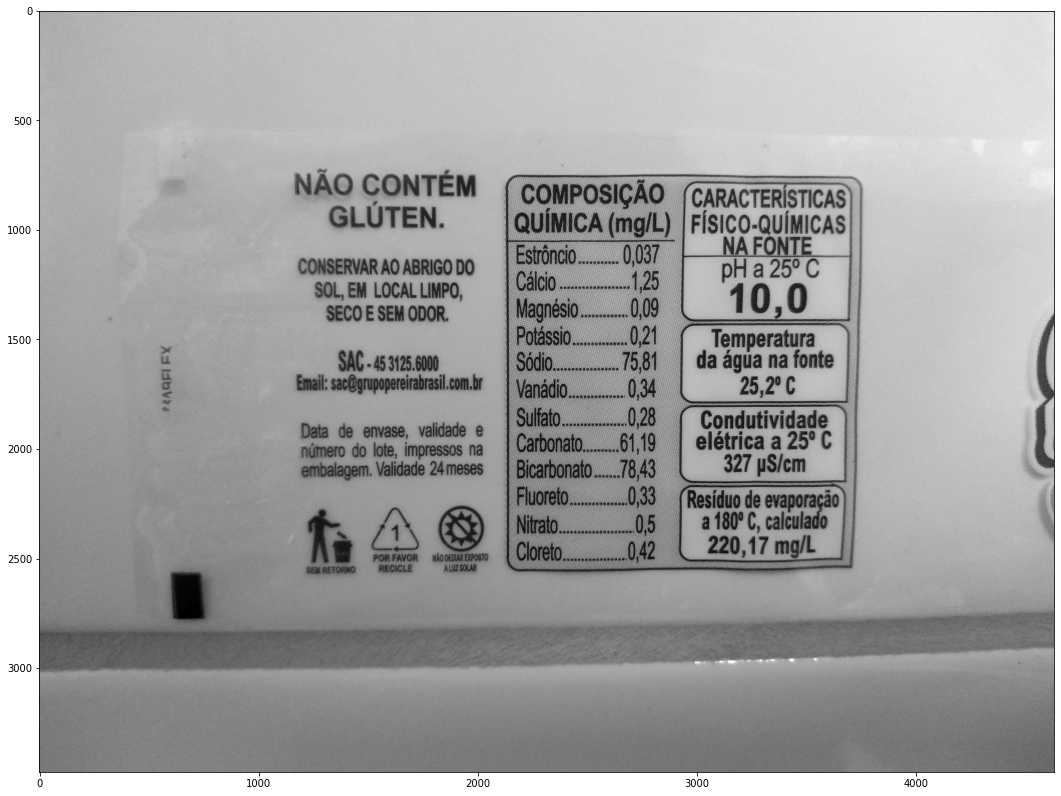

In [3]:
plt.figure(figsize=(220,14))
plt.imshow(img, cmap='gray')

In [4]:
mser = cv2.MSER_create()
regions, bounding_boxes = mser.detectRegions(img)

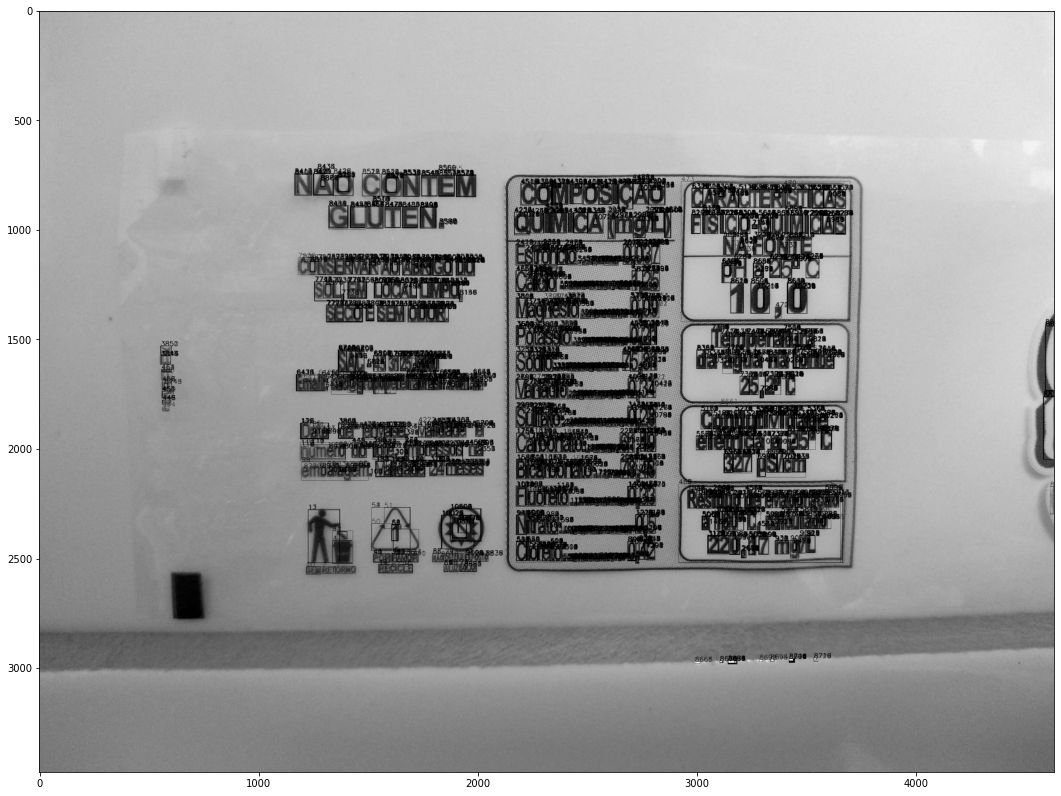

In [10]:
vis = img.copy()
test = []
for i, p in enumerate(regions):
    xmax, ymax = np.amax(p, axis=0)
    xmin, ymin = np.amin(p, axis=0)
    test.append(((xmax, ymax), (xmin, ymin)))
    cv2.rectangle(vis, (xmin,ymax), (xmax,ymin), (0, 255, 0), 1)
    font = cv2.FONT_HERSHEY_SIMPLEX
    cv2.putText(vis, str(i), (xmin, ymin), font, 1, (0, 255, 0), 1, cv2.LINE_AA)

plt.figure(figsize=(220,14))
plt.imshow(vis, cmap='gray')

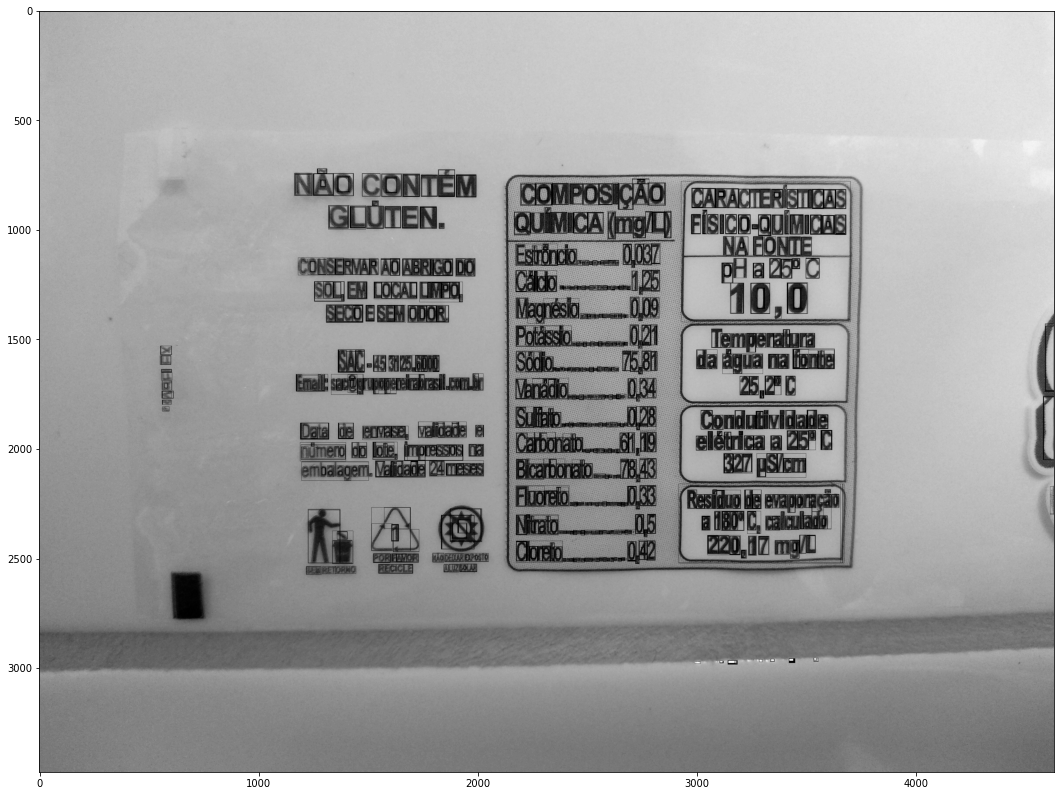

In [106]:
vis = img.copy()
test = []
count = 0
for bb in bounding_boxes:
    x, y, w, h = bb
    xmax = x + w
    ymax = y + h
    xmin = x
    ymin = y
    cv2.rectangle(vis, (xmin,ymax), (xmax,ymin), (0, 255, 0), 1)

plt.figure(figsize=(220,14))
plt.imshow(vis, cmap='gray')

In [89]:
vis = img.copy()
test = []
# count = 0
# for bb in bounding_boxes:
#     x, y, w, h = bb
#     xmax = x + w
#     ymax = y + h
#     xmin = x
#     ymin = y

In [6]:
def 

11741

In [ ]:
filtered_bb = [bounding_boxes[0]]

In [70]:
(xmax, ymax), (xmin, ymin) = test[3000]

In [79]:
text = []
for i, t in enumerate(test):
    if i % 100 == 0:
        print(f"{len(test) - i} left...")
    (xmax, ymax), (xmin, ymin) = t
    output = pytesseract.image_to_string(img[ymin:ymax, xmin:xmax])
    if output != '\x0c':
        print(f"output for {i}, = {output}")
        text.append(output)

11741 left...
output for 0, =  

output for 4, = -

output for 15, =  

output for 16, =  

output for 31, = 4

output for 33, = e

output for 35, =  

output for 37, = 4

output for 71, =  

output for 72, = e

o

output for 77, =  



KeyboardInterrupt: 

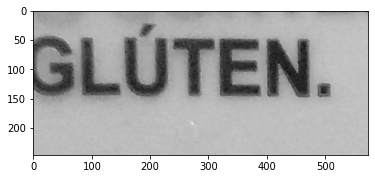

In [35]:
(xmax, ymax), (xmin, ymin) = test[8500]
plt.imshow(img[ymin - 50 :ymax + 100, xmin - 400:xmax + 100], cmap='gray')

In [37]:
print(pytesseract.image_to_string(img[ymin - 50 :ymax + 100, xmin - 400:xmax + 100], lang='por'))

GLÚTEN.



In [27]:
img[ymin:ymax, xmin:xmax]

array([[141, 128, 111, ..., 140, 156, 160],
       [122, 106, 104, ..., 116, 128, 149],
       [120, 104, 107, ...,  97, 107, 143],
       ...,
       [157, 121,  71, ..., 110, 104, 106],
       [178, 145,  93, ..., 108, 100,  94],
       [163, 154, 131, ...,  93,  89,  83]], dtype=uint8)

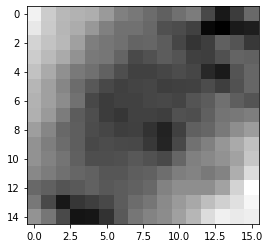

In [59]:
(xmax, ymax), (xmin, ymin) = test[8507]
plt.imshow(img[ymin:ymax, xmin:xmax], cmap='gray')

In [51]:
(xmax_1, ymax_1), (xmin_1, ymin_1) = test[8500]
img[ymin:ymax, xmin:xmax]
test[8500]

((1813, 994), (1739, 897))

In [57]:
(xmax_2, ymax_2), (xmin_2, ymin_2) = test[8507]
img[ymin:ymax, xmin:xmax]
test[8501]

((1813, 995), (1739, 896))

In [58]:
x_left = max(xmin_1, xmin_2)
y_top = max(ymin_1, ymin_2)
x_right = min(xmax_1, xmax_2)
y_bottom = min(ymax_1, ymax_2)

intersection_area = (x_right - x_left) * (y_bottom - y_top)
bb1_area = (xmax_1 - xmin_1) * (ymax_1 - ymin_1)
bb2_area = (xmax_2 - xmin_2) * (ymax_2 - ymin_2)

iou = intersection_area / float(bb1_area + bb2_area - intersection_area)
iou

0.3161816891412349

In [ ]:
diabo = []

for i in len(test):
    (xmax_1, ymax_1), (xmin_1, ymin_1) = test[8500]
    

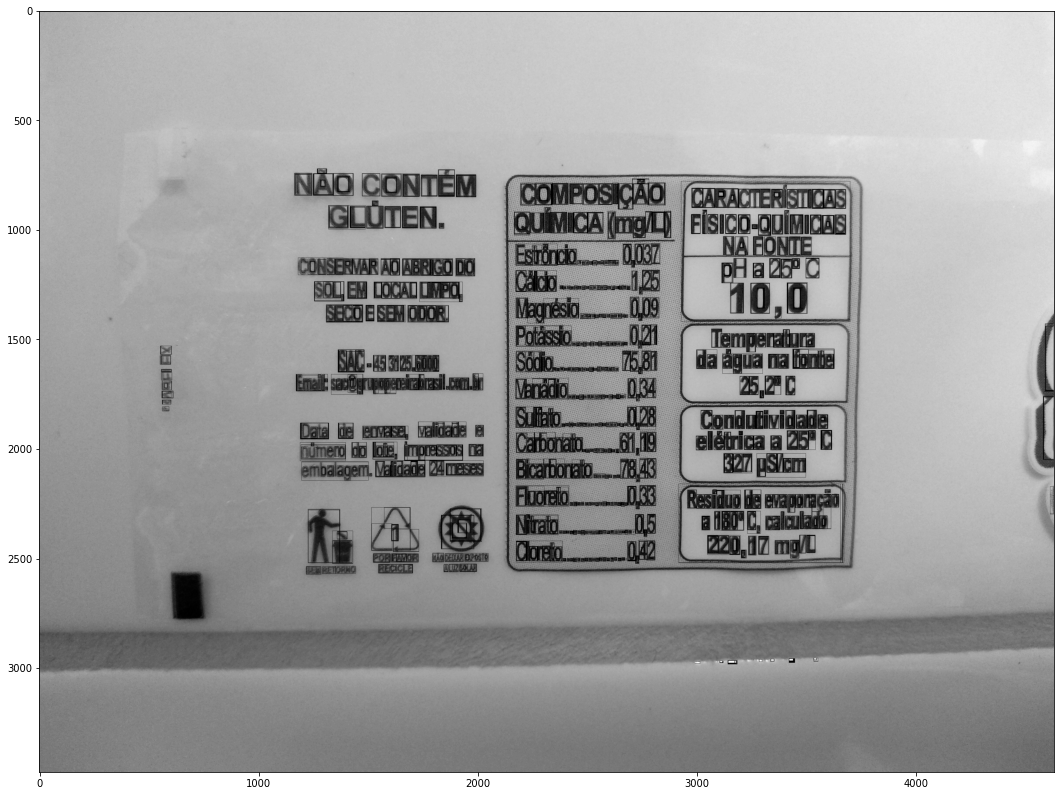

In [66]:
plt.figure(figsize=(220,14))
plt.imshow(vis, cmap='gray')

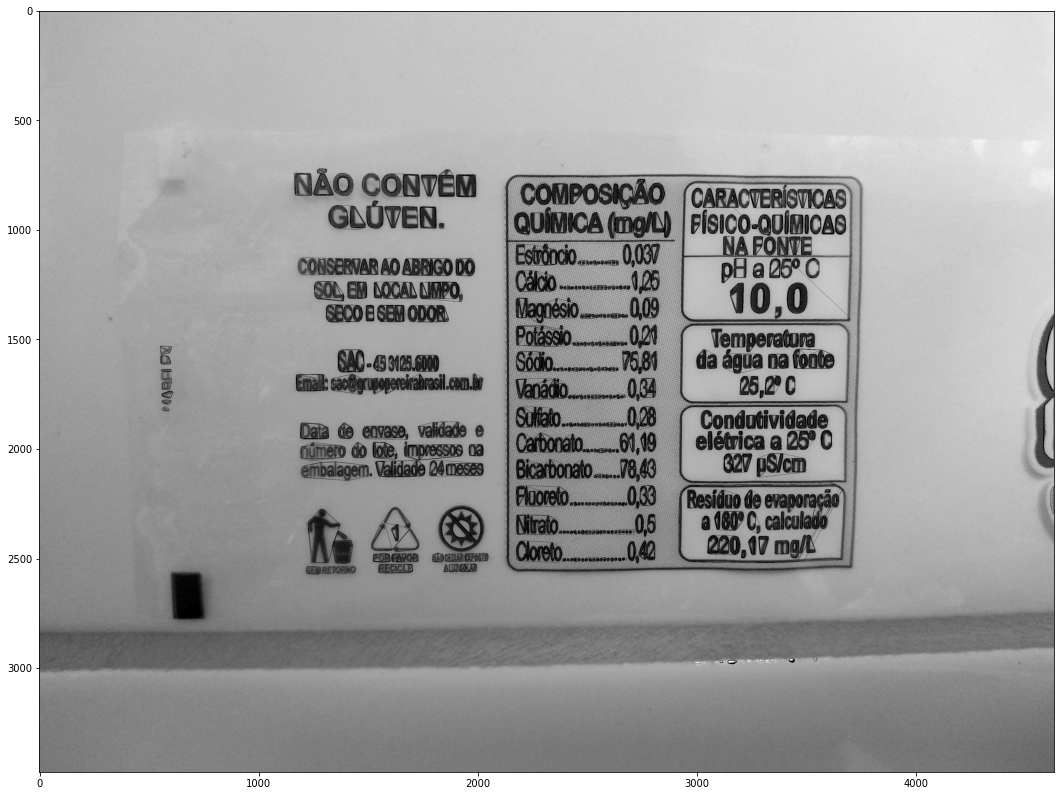

In [26]:
vis = img.copy()
hulls = [cv2.convexHull(p.reshape(-1, 1, 2)) for p in regions]
cv2.polylines(vis, hulls, 1, (0, 255, 0))
plt.figure(figsize=(220,14))
plt.imshow(vis, cmap='gray')

In [9]:
ocr_text = pytesseract.image_to_string(img)
print(ocr_text)

In [20]:
results = {}
for filename in sorted(glob.glob("../images/agua/flat/a/*")):
    print(filename)
    img = cv2.imread(filename, cv2.IMREAD_GRAYSCALE)
#     bl = remove_noise(img)
#     th = thresholding(bl)
#     op = opening(th)
#     cn = canny(op)
#     transf = [img, bl, th, op, cn]
    transf = [img]
    texts = []
    for t in transf:
        texts.append(pytesseract.image_to_string(t))
        texts.append(pytesseract.image_to_string(t, lang='por'))
    
    results[filename] = texts

../images/agua/flat/a/Screenshot_20210327_092316.png
../images/agua/flat/a/Screenshot_20210327_092408.png
../images/agua/flat/a/Screenshot_20210327_092544.png
../images/agua/flat/a/Screenshot_20210327_093801.png
../images/agua/flat/a/Screenshot_20210327_093820.png
../images/agua/flat/a/Screenshot_20210327_093907.png
../images/agua/flat/a/Screenshot_20210327_093935.png
../images/agua/flat/a/Screenshot_20210327_093954.png
../images/agua/flat/a/Screenshot_20210327_094011.png
../images/agua/flat/a/Screenshot_20210327_094019.png
../images/agua/flat/a/Screenshot_20210327_094034.png
../images/agua/flat/a/Screenshot_20210327_094045.png
../images/agua/flat/a/Screenshot_20210327_094053.png


In [26]:
for k, v in results.items():
    print("-----------")
    print(f"For {k}...")
    
    print(v[0])
    print("-----------")

-----------
For ../images/agua/flat/a/Screenshot_20210327_092316.png...
Temperatura
da dgua na fonte
252°C

Condutividade
elétrica a 25° C
327 ySlem

Residuo de evaporagdo
a180°c, g?cpula o
220,17 mg/L

 

-----------
-----------
For ../images/agua/flat/a/Screenshot_20210327_092408.png...
 

-----------
-----------
For ../images/agua/flat/a/Screenshot_20210327_092544.png...
CONCESSOMEL OLSTRA ONERC K LTEMOS ERBRAL
OF . TLKL80005145 - - 400003
Local da Fonte: Rua osé Parex, 7 138 - Nowo Sk - ok

Fonte: fe: Novo Sobradmh

 

ﬂ!! !!"!l

-----------
-----------
For ../images/agua/flat/a/Screenshot_20210327_093801.png...
NAO CONTEM

GLUTEN.
CONSERVAR AO ABRIGO DO
SOL, EM LOCAL LIMPO,
SECO E SEM ODOR.
Temperatura
SAC-453125.5000 da 4gua na fonte
Emil: sac@grupopereirabrasil com 25,2°C
? i Condutividade
Data de envase, validade e .
: h elétricaa 25°C
Wmﬁg,“m.mvagd;"‘dem i 327 pSlem

 

Residuo de evaporagao
1 2180°C, calcul
Css 220,17 mg/L

-----------
-----------
For ../images/agua/flat/